In [19]:
import requests
import bs4
import numpy as np
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt
def flatten(arr):
    if isinstance(arr, list):
        flattened = []
        for a in arr:
            if isinstance(a, list):
                flattened += a
            else:
                flattened += [a]
        if len(arr) == len(flattened):
            return flattened
        else:
            return flatten(flattened)
    else:
        return arr

In [20]:
siteOrigin = "https://www.vivareal.com.br/"

link0 = 'https://www.vivareal.com.br/aluguel/rj/sao-goncalo/#preco-ate=3000&preco-desde=500&preco-total=sim&quartos=2&tipos=casa_residencial,apartamento_residencial'
res0 = requests.get(link0)
soup0 = bs4.BeautifulSoup(res0.text,"lxml")
links = [link0]

linkTemp = "https://www.vivareal.com.br/aluguel/rj/sao-goncalo/casa_residencial/?pagina=2#preco-ate=3000&preco-desde=500&preco-total=sim&quartos=2&tipos=casa_residencial,apartamento_residencial"
res = requests.get(linkTemp)
soup =  bs4.BeautifulSoup(res.text,"lxml")
i = 2
while str(soup0)[:1000] != str(soup)[:1000]:
    clear_output()
    print("Pages Found: " + str(i))
    links += [linkTemp]
    i += 1
    linkTemp = "https://www.vivareal.com.br/aluguel/rj/sao-goncalo/casa_residencial/?pagina=" + str(i) + "#preco-ate=3000&preco-desde=500&preco-total=sim&quartos=2&tipos=casa_residencial,apartamento_residencial"
    res = requests.get(linkTemp)
    soup =  bs4.BeautifulSoup(res.text,"lxml")
    

# allTags = list(sorted(np.unique(flatten([tag.name for tag in soup.find_all(class_=True)]))))
# allClasses = list(sorted(np.unique(flatten([tag['class'] for tag in soup.find_all(class_=True)]))))

Pages Found: 13


KeyboardInterrupt: 

In [21]:
links

['https://www.vivareal.com.br/aluguel/rj/sao-goncalo/#preco-ate=3000&preco-desde=500&preco-total=sim&quartos=2&tipos=casa_residencial,apartamento_residencial',
 'https://www.vivareal.com.br/aluguel/rj/sao-goncalo/casa_residencial/?pagina=2#preco-ate=3000&preco-desde=500&preco-total=sim&quartos=2&tipos=casa_residencial,apartamento_residencial',
 'https://www.vivareal.com.br/aluguel/rj/sao-goncalo/casa_residencial/?pagina=3#preco-ate=3000&preco-desde=500&preco-total=sim&quartos=2&tipos=casa_residencial,apartamento_residencial',
 'https://www.vivareal.com.br/aluguel/rj/sao-goncalo/casa_residencial/?pagina=4#preco-ate=3000&preco-desde=500&preco-total=sim&quartos=2&tipos=casa_residencial,apartamento_residencial',
 'https://www.vivareal.com.br/aluguel/rj/sao-goncalo/casa_residencial/?pagina=5#preco-ate=3000&preco-desde=500&preco-total=sim&quartos=2&tipos=casa_residencial,apartamento_residencial',
 'https://www.vivareal.com.br/aluguel/rj/sao-goncalo/casa_residencial/?pagina=6#preco-ate=3000&p

In [22]:
interestingClass = '.js-property-card'
properties = ['titulo', 'preco', 'endereco', 'area', 'nQuartos', 'nBanheiros', 'nVagas', 'link']
casas = {p:[] for p in properties}

for i in range(len(links)):
    res = requests.get(links[i])
    soup = bs4.BeautifulSoup(res.text,"lxml")
    
    for j in range(len(soup.select(interestingClass))):
        clear_output()
        print("Page: " + str(i) + " / " + str(len(links)) + " | Houses: " + str(j) + " / " + str(len(soup.select(interestingClass))))
        title = soup.select(interestingClass)[j].select('.property-card__title')[0].text[2:-2]
        address = soup.select(interestingClass)[j].select('.property-card__address')[0].text
        area = soup.select(interestingClass)[j].select('.property-card__detail-area')[0].text.replace(" ", "")
        nRooms = soup.select(interestingClass)[j].select('.property-card__detail-room')[0].text.replace(' ','').replace("Q"," Q")
        nBaths = soup.select(interestingClass)[j].select('.property-card__detail-bathroom')[0].text.replace(' ','').replace("B"," B")
        nGarage = soup.select(interestingClass)[j].select('.property-card__detail-garage')[0].text.replace(' ','').replace("V"," V")
        price = soup.select(interestingClass)[j].select('.property-card__price')[0].text.split("    ")[0].replace(' ','')
        href = siteOrigin + str(soup.select(interestingClass)[j]).split('href=\"')[1].split('\">')[0]
        casas['titulo'] += [title]
        casas['preco'] += [price]
        casas['endereco'] += [address]
        casas['area'] += [area]
        casas['nQuartos'] += [nRooms]
        casas['nBanheiros'] += [nBaths]
        casas['nVagas'] += [nGarage]
        casas['link'] += [href]
casas_df = pd.DataFrame(casas)

Page: 12 / 13 | Houses: 35 / 36


ValueError: invalid literal for int() with base 10: '--'

In [35]:
casas_df['preco_valor'] = [int(preco.replace("R$","").replace('/Mês',"").replace(".","")) for preco in casas_df['preco']]
casas_df['area_valor'] = [int(area.replace("m²","")) for area in casas_df['area']]

nBanheirosValor = [nBanheiros.replace(" Banheiros","").replace(" Banheiro","") for nBanheiros in casas_df['nBanheiros']]
nQuartosValor = [nQuartos.replace(" Quartos","").replace(" Quarto","") for nQuartos in casas_df['nQuartos']]
nVagasValor = [nVagas.replace(" Vagas","").replace(" Vaga","") for nVagas in casas_df['nVagas']]

for i in range(len(nVagasValor)):
    if '--' in nVagasValor[i]:
        nVagasValor[i] = 0
    else:
        nVagasValor[i] = int(nVagasValor[i])
        
    if '--' in nQuartosValor[i]:
        nQuartosValor[i] = 0
    else:
        nQuartosValor[i] = int(nQuartosValor[i])
        
    if '--' in nBanheirosValor[i]:
        nBanheirosValor[i] = 0
    else:
        nBanheirosValor[i] = int(nBanheirosValor[i])
casas_df['nVagas_valor'] = nVagasValor
casas_df['nQuartos_valor'] = nQuartosValor
casas_df['nBanheiros_valor'] = nBanheirosValor

casas_df = casas_df.drop_duplicates()
casas_df

titulo        preco  \
0     Apartamento com 2 Quartos para Aluguel, 53m²    R$600/Mês   
1    Ponto comercial/Loja/Box    para Aluguel, 4m²  R$1.500/Mês   
2   Galpão/Depósito/Armazém    para Aluguel, 350m²  R$3.500/Mês   
3     Apartamento com 2 Quartos para Aluguel, 65m²  R$1.000/Mês   
4           Casa com 2 Quartos para Aluguel, 120m²  R$2.000/Mês   
..                                             ...          ...   
67           Casa com 2 Quartos para Aluguel, 80m²    R$700/Mês   
68        Casa com 5 Quartos à Venda/Aluguel 260m²  R$1.600/Mês   
69             Casa com  Quarto para Aluguel, 35m²    R$440/Mês   
70           Casa com 2 Quartos para Aluguel, 75m²  R$1.100/Mês   
71           Casa com 2 Quartos para Aluguel, 90m²  R$1.200/Mês   

                                             endereco   area   nQuartos  \
0   Rua Alberto Torres, 2236 - Neves Neves, São Go...   53m²  2 Quartos   
1   Rua Manuel João Gonçalves, 408 - Alcântara, Sã...    4m²  -- Quarto   
2     Rua Uberlândia, 82 - Trindade, São Gonçalo - RJ  350m²  -- Quarto   
3     Rua Padre Gusmão, 49 - Centro, São Gonçalo - RJ   65m²  2 Quartos   
4   Travessa João Damasceno, 63 - Porto Velho, São...  120m²  2 Quartos   
..                                                ...    ...        ...   
67  Rua Doutor March, 937 - Tenente Jardim, São Go...   80m²  2 Quartos   
68  Travessa João Sampaio, 79 - Sete Pontes, São G...  260m²  5 Quartos   
69  Travessa Maria Rita, 26 - Porto Novo, São Gonç...   35m²   1 Quarto   
70  Rua Gildasio Amado, 490 - Jardim Alcantara, Sã...   75m²  2 Quartos   
71                         Trindade, São Gonçalo - RJ   90m²  2 Quartos   

     nBanheiros   nVagas                                               link  \
0    1 Banheiro  -- Vaga  https://www.vivareal.com.br//imovel/apartament...   
1   -- Banheiro  -- Vaga  https://www.vivareal.com.br//imovel/ponto-come...   
2   2 Banheiros  -- Vaga  https://www.vivareal.com.br//imovel/galpao-dep...   
3    1 Banheiro   1 Vaga  https://www.vivareal.com.br//imovel/apartament...   
4   2 Banheiros   1 Vaga  https://www.vivareal.com.br//imovel/imovel-com...   
..          ...      ...                                                ...   
67  2 Banheiros  -- Vaga  https://www.vivareal.com.br//imovel/casa-2-qua...   
68  4 Banheiros  2 Vagas  https://www.vivareal.com.br//imovel/casa-5-qua...   
69   1 Banheiro  -- Vaga  https://www.vivareal.com.br//imovel/casa-1-qua...   
70   1 Banheiro   1 Vaga  https://www.vivareal.com.br//imovel/casa-2-qua...   
71   1 Banheiro  2 Vagas  https://www.vivareal.com.br//imovel/casa-2-qua...   

    preco_valor  area_valor  nVagas_valor  nQuartos_valor  nBanheiros_valor  
0           600          53             0               2                 1  
1          1500           4             0               0                 0  
2          3500         350             0               0                 2  
3          1000          65             1               2                 1  
4          2000         120             1               2                 2  
..          ...         ...           ...             ...               ...  
67          700          80             0               2                 2  
68         1600         260             2               5                 4  
69          440          35             0               1                 1  
70         1100          75             1               2                 1  
71         1200          90             2               2                 1  

[68 rows x 13 columns]

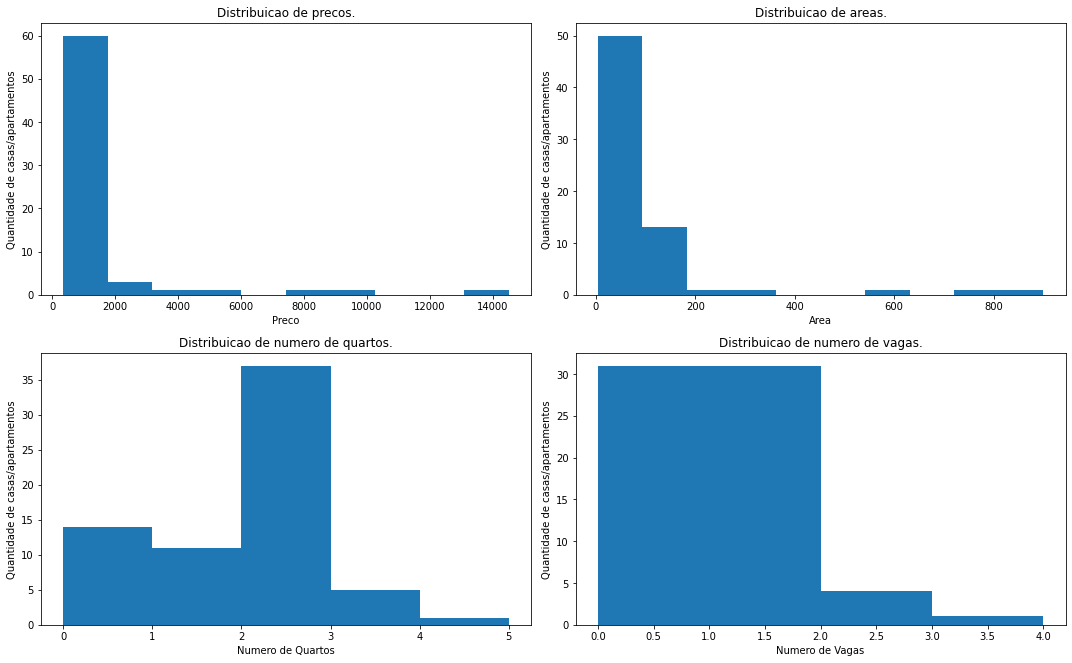

In [36]:
fig, ax = plt.subplots(2, 2, figsize = [1.5*10, 1.5*10/1.61])
ax[0, 0].hist(casas_df['preco_valor'])
ax[0, 0].set_title("Distribuicao de precos.")
ax[0, 0].set_xlabel("Preco")
ax[0, 0].set_ylabel("Quantidade de casas/apartamentos")

ax[0, 1].hist(casas_df['area_valor'])
ax[0, 1].set_title("Distribuicao de areas.")
ax[0, 1].set_xlabel("Area")
ax[0, 1].set_ylabel("Quantidade de casas/apartamentos")

ax[1, 0].hist(casas_df['nQuartos_valor'], bins = range(6))
ax[1, 0].set_title("Distribuicao de numero de quartos.")
ax[1, 0].set_xlabel("Numero de Quartos")
ax[1, 0].set_ylabel("Quantidade de casas/apartamentos")

ax[1, 1].hist(casas_df['nVagas_valor'], bins = range(5))
ax[1, 1].set_title("Distribuicao de numero de vagas.")
ax[1, 1].set_xlabel("Numero de Vagas")
ax[1, 1].set_ylabel("Quantidade de casas/apartamentos")

fig.tight_layout()

In [37]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="fredHouser")
latitudes = []
longitudes = []
i = 0
for endereco in casas_df['endereco']:
    clear_output()
    print("Finding address coordinates: " + str(i) + " / " + str(len(casas_df)))
    i += 1
    location = geolocator.geocode(endereco)
    if location == None:
        latitudes += [np.nan]
        longitudes += [np.nan]
    else:
        latitudes += [location.latitude]
        longitudes += [location.longitude]
casas_df['latitude'] = latitudes
casas_df['longitude'] = longitudes

Finding address coordinates: 67 / 68


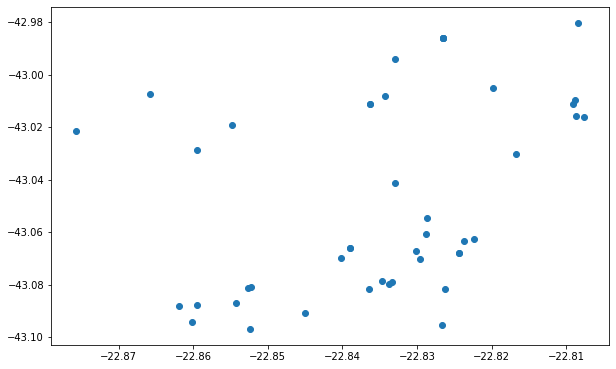

In [39]:
fig, ax = plt.subplots(figsize = [10, 10/1.61])
ax.scatter(casas_df['latitude'], casas_df['longitude'])

In [59]:
import folium
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
from folium.plugins import MarkerCluster
from matplotlib.colors import rgb2hex

casas_df = casas_df[casas_df['nQuartos_valor'] > 0].dropna().drop(labels = [24],axis = 'rows')
casas_df['goodness'] = casas_df['preco_valor']/casas_df['nQuartos_valor']
cmap = cm.get_cmap('spring')
cmap = LinearSegmentedColormap.from_list("", ["green","yellow","red"])

maxPrice = max(casas_df['goodness'])
minPrice = min(casas_df['goodness'])

m = folium.Map(location=casas_df[["latitude", "longitude"]].mean().to_list(), zoom_start=2)

for i,r in casas_df.dropna().iterrows():
    location = (r["latitude"], r["longitude"])
    color = cmap((r['goodness'] - minPrice)/(maxPrice-minPrice))
    color = rgb2hex(color)
    folium.CircleMarker(
    location=location,
    color=color,
    fill=True,
    fill_color=color).add_to(m)

In [60]:
m

In [54]:
casas_df

titulo         preco  \
14      Apartamento com 2 Quartos para Aluguel, 100m²     R$699/Mês   
15             Casa com 2 Quartos para Aluguel, 100m²   R$1.500/Mês   
18       Apartamento com 2 Quartos para Aluguel, 55m²     R$700/Mês   
20       Apartamento com 2 Quartos para Aluguel, 80m²   R$1.000/Mês   
21       Apartamento com 2 Quartos para Aluguel, 55m²     R$805/Mês   
24  Prédio/Edifício inteiro com  Quarto para Alugu...  R$14.500/Mês   
25              Casa com 3 Quartos para Aluguel, 85m²   R$1.000/Mês   
27         Casa com 2 Quartos para Venda/Aluguel 70m²     R$900/Mês   
28             Casa com 2 Quartos para Aluguel, 100m²     R$900/Mês   
29       Apartamento com 2 Quartos para Aluguel, 70m²     R$900/Mês   
32       Apartamento com 2 Quartos para Aluguel, 60m²     R$690/Mês   
33       Apartamento com 2 Quartos para Aluguel, 50m²     R$850/Mês   
40             Casa com 2 Quartos para Aluguel, 100m²   R$1.500/Mês   
41                Casa com  Quarto para Aluguel, 50m²     R$550/Mês   
42             Casa com 2 Quartos para Aluguel, 100m²   R$1.000/Mês   
43              Casa com 2 Quartos para Aluguel, 90m²     R$800/Mês   
44              Casa com 2 Quartos para Aluguel, 75m²   R$1.100/Mês   
45              Casa com 2 Quartos para Aluguel, 80m²   R$1.500/Mês   
46              Casa com 2 Quartos para Aluguel, 90m²   R$1.100/Mês   
48              Casa com 2 Quartos para Aluguel, 65m²     R$800/Mês   
50                Casa com  Quarto para Aluguel, 40m²     R$450/Mês   
51                Casa com  Quarto para Aluguel, 42m²     R$350/Mês   
52              Casa com 3 Quartos para Aluguel, 80m²     R$650/Mês   
53              Casa com 2 Quartos para Aluguel, 60m²     R$700/Mês   
54                Casa com  Quarto para Aluguel, 50m²     R$700/Mês   
55                Casa com  Quarto para Aluguel, 30m²     R$500/Mês   
56              Casa com 2 Quartos para Aluguel, 60m²     R$950/Mês   
57             Casa com 2 Quartos para Aluguel, 100m²   R$1.100/Mês   
58                Casa com  Quarto para Aluguel, 35m²     R$440/Mês   
59                Casa com  Quarto para Aluguel, 40m²     R$600/Mês   
60              Casa com  Quarto à Venda/Aluguel 58m²     R$650/Mês   
61              Casa com 2 Quartos para Aluguel, 60m²     R$990/Mês   
62              Casa com 2 Quartos para Aluguel, 50m²     R$600/Mês   
65              Casa com 2 Quartos para Aluguel, 80m²   R$1.100/Mês   
66                Casa com  Quarto para Aluguel, 30m²     R$500/Mês   
67              Casa com 2 Quartos para Aluguel, 80m²     R$700/Mês   
69                Casa com  Quarto para Aluguel, 35m²     R$440/Mês   
71              Casa com 2 Quartos para Aluguel, 90m²   R$1.200/Mês   

                                             endereco   area   nQuartos  \
14  Rua Visconde de Itaúna, 2638 - Paraíso, São Go...  100m²  2 Quartos   
15  Travessa Correia Torres, 319 - Paraíso, São Go...  100m²  2 Quartos   
18                        Vila Lage, São Gonçalo - RJ   55m²  2 Quartos   
20  Rua Jaime de Moura, 387 - Porto da Pedra, São ...   80m²  2 Quartos   
21     Rua Augusto Rush - Colubandê, São Gonçalo - RJ   55m²  2 Quartos   
24  Rua Bispo Dom Mamede, 25 - Laranjal, São Gonça...  750m²   1 Quarto   
25                    Venda da Cruz, São Gonçalo - RJ   85m²  3 Quartos   
27     Rua Luís Lópes, 90 - Arsenal, São Gonçalo - RJ   70m²  2 Quartos   
28                   Santa Catarina, São Gonçalo - RJ  100m²  2 Quartos   
29                           Centro, São Gonçalo - RJ   70m²  2 Quartos   
32  Rua Doutor Alfredo Backer - Alcântara, São Gon...   60m²  2 Quartos   
33                          Covanca, São Gonçalo - RJ   50m²  2 Quartos   
40  Rua Expedicionário Octávio Rodrigues - Tribobó...  100m²  2 Quartos   
41      Rua Baependi, 45 - Trindade, São Gonçalo - RJ   50m²   1 Quarto   
42                            Rocha, São Gonçalo - RJ  100m²  2 Quartos   
43                   Santa Catarina, São Gonçalo - RJ   90m²  2 Quartos   
44